In [1]:
from datetime import datetime, timedelta, time
import pandas as pd
import numpy as np
import datajoint as dj
dj.conn()
from pipeline import pipeline_tools, lab, experiment, behavioranal
import matplotlib.pyplot as plt
import decimal
from scipy.stats import norm
import scipy
%matplotlib inline
from plot.plot_behavior import *

Connecting rozmar@mesoscale-activity.datajoint.io:3306


No handles with labels found to put in legend.
No handles with labels found to put in legend.


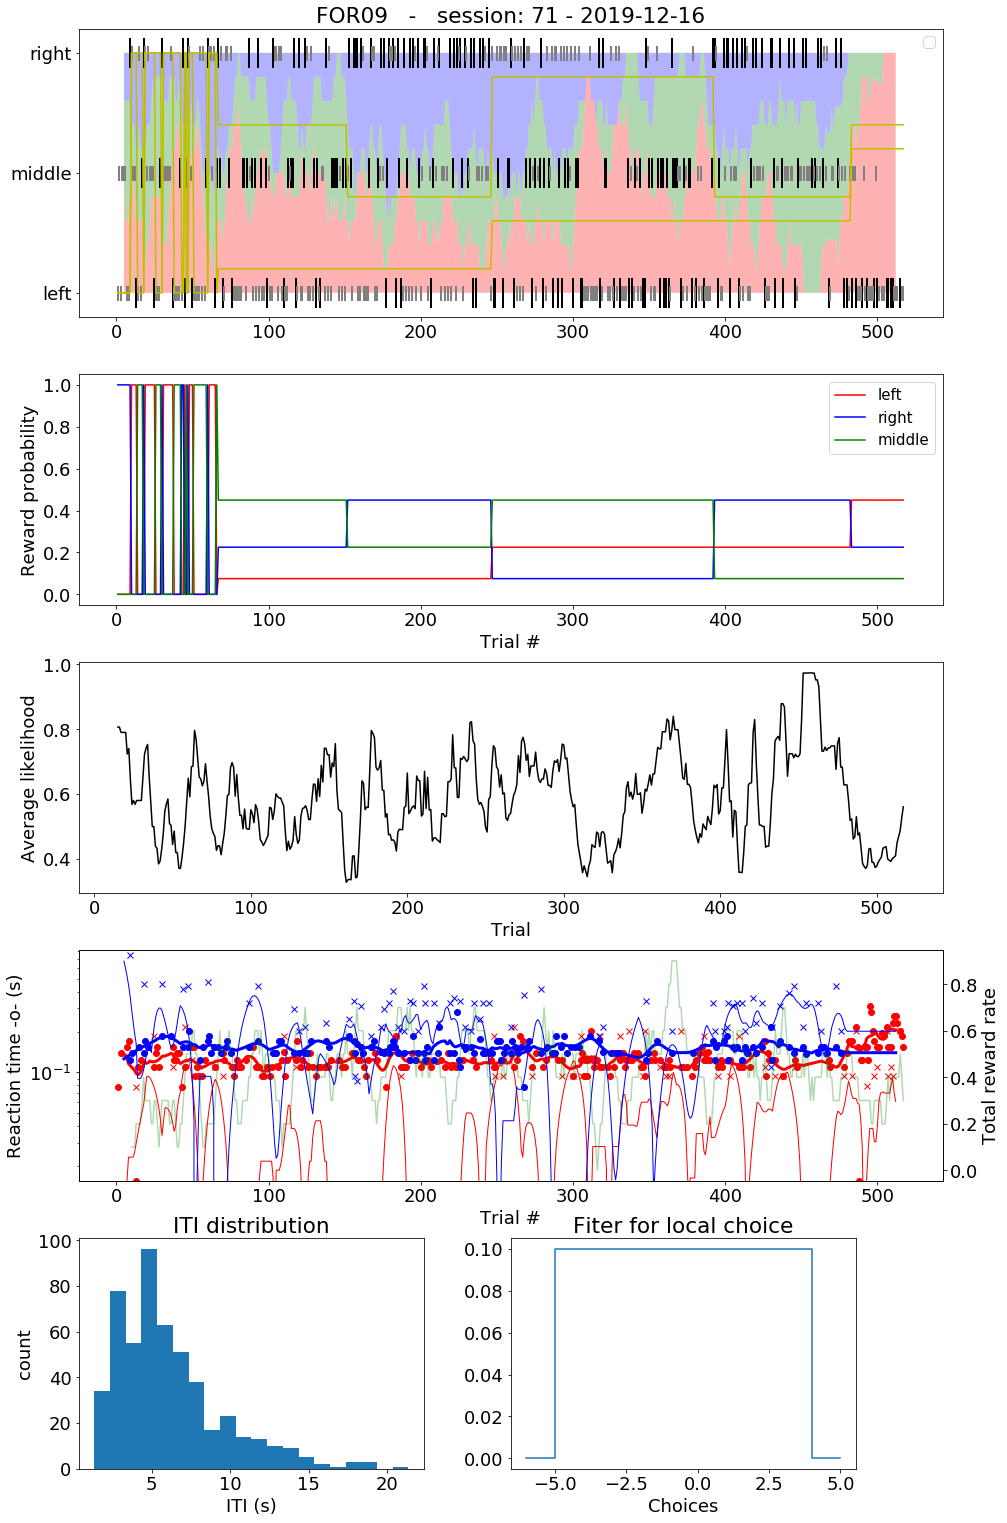

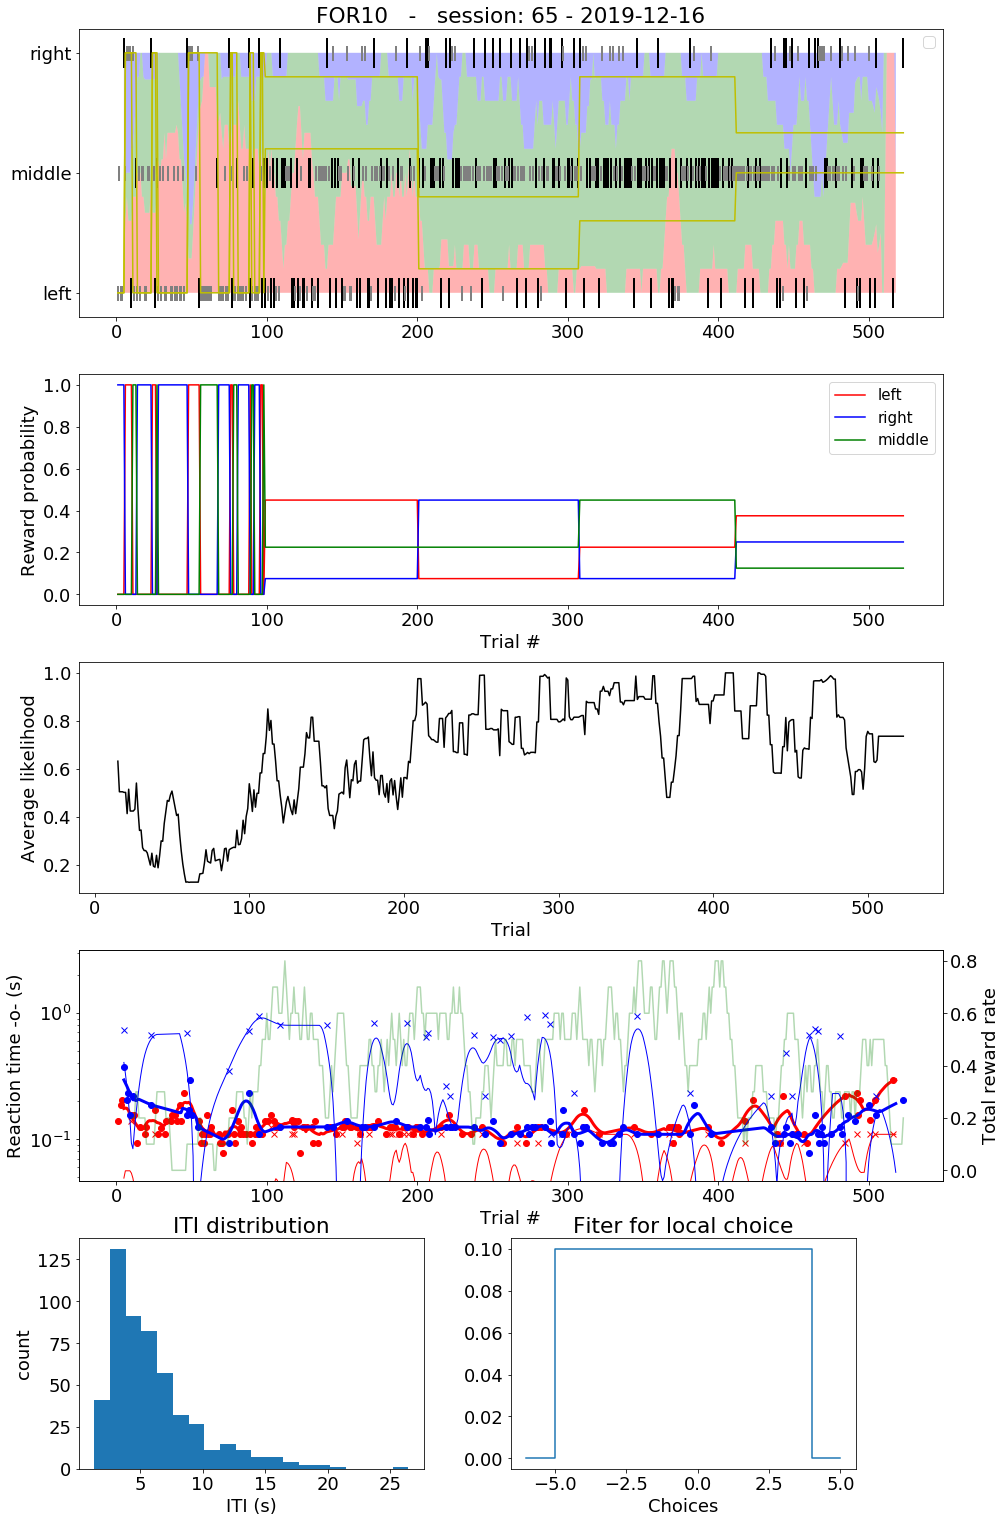

In [2]:
#plot the last session for the 3 lickport foraging mice:
plot_one_session(wr_name = 'FOR09',session = 'last')
plot_one_session(wr_name = 'FOR10',session = 'last')

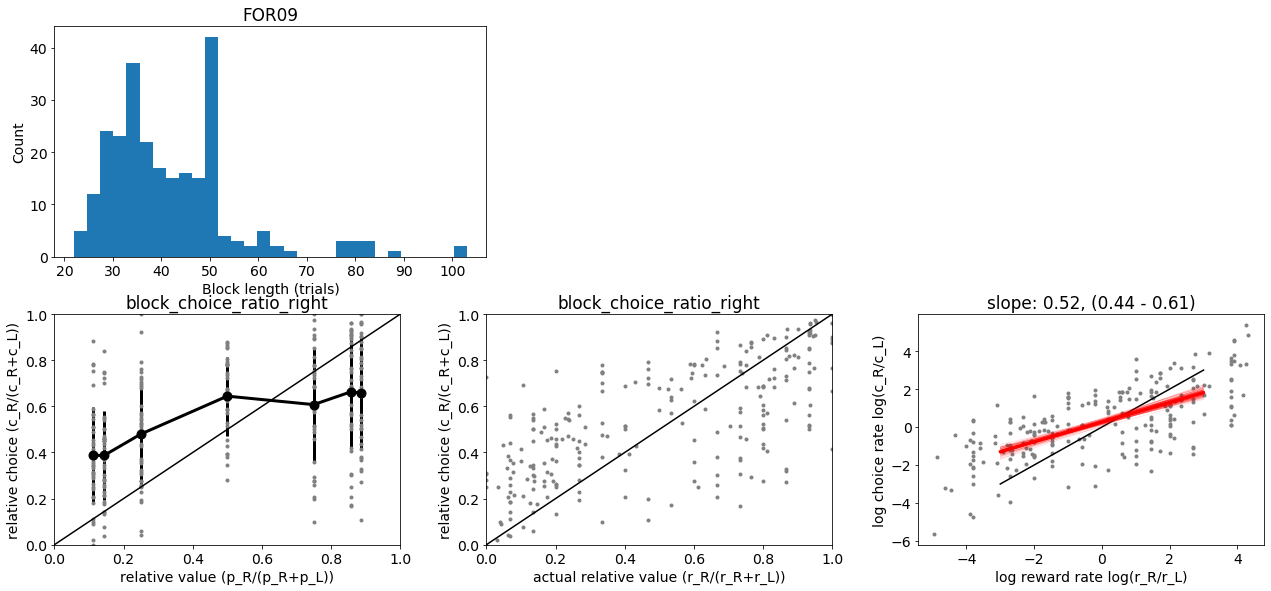

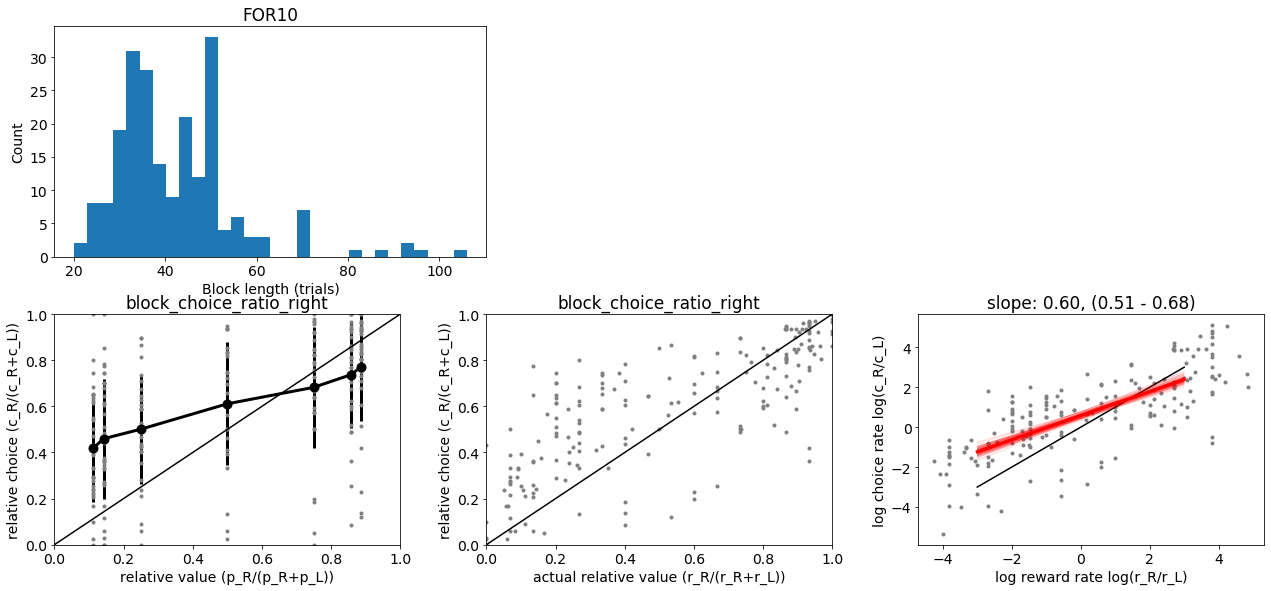

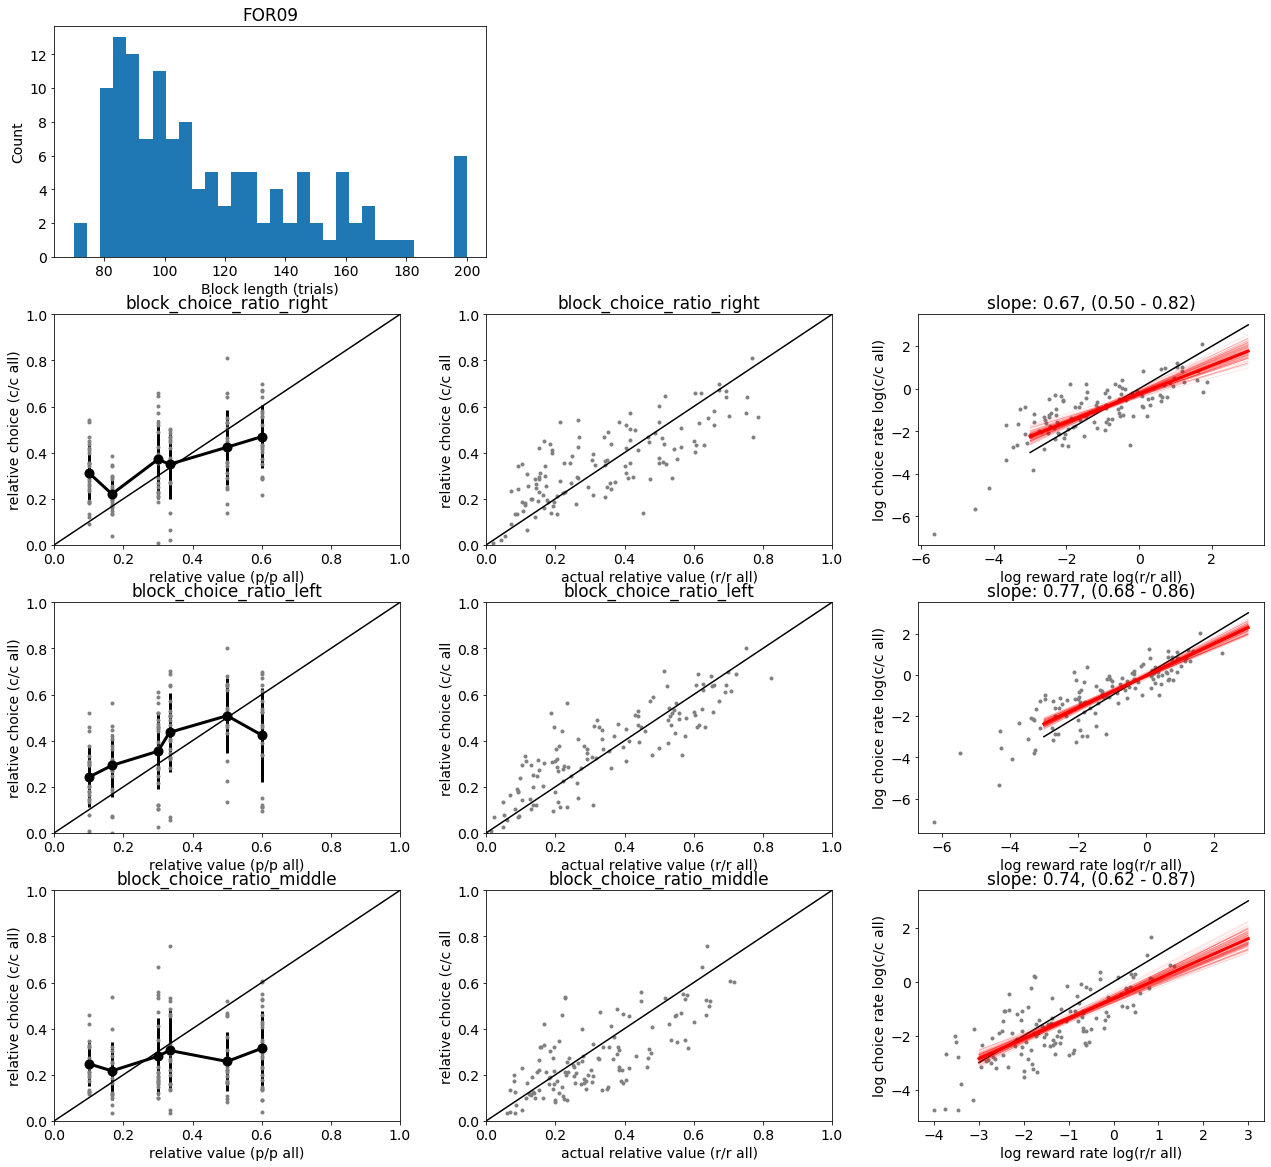

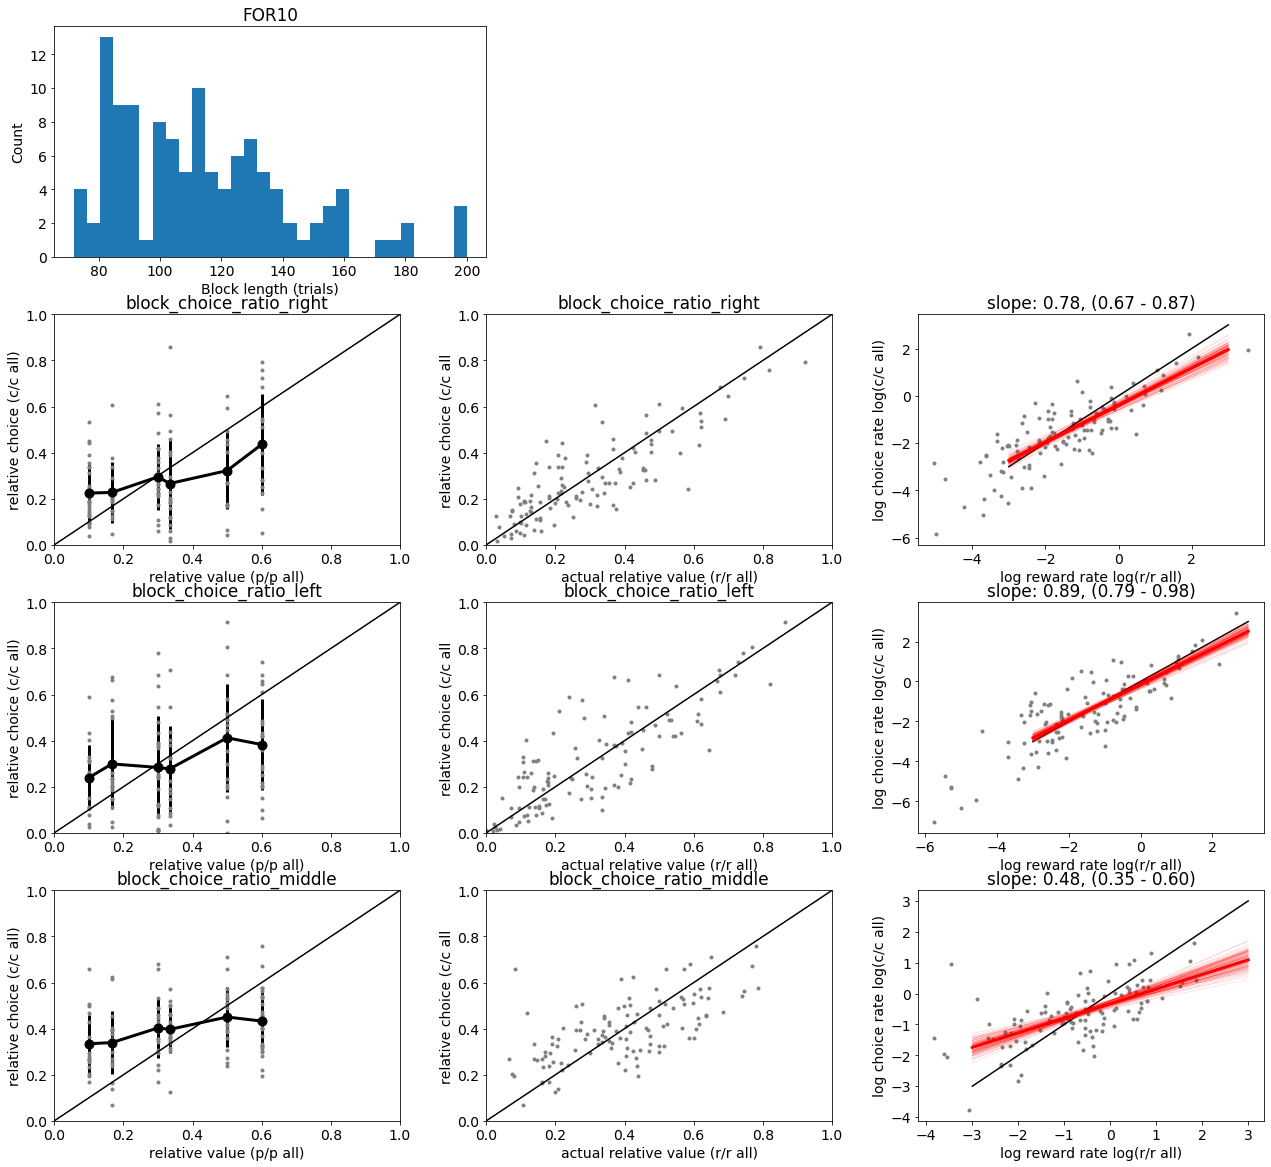

In [3]:
#block based tuning curves
temp = plot_block_based_tuning_curves(wr_name = 'FOR09',
                               minsession = 20,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
temp = plot_block_based_tuning_curves(wr_name = 'FOR10',
                               minsession = 20,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
temp = plot_block_based_tuning_curves_three_lickports(wr_name = 'FOR09',
                               minsession = 20,
                               mintrialnum = 70,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
temp = plot_block_based_tuning_curves_three_lickports(wr_name = 'FOR10',
                               minsession = 20,
                               mintrialnum = 70,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)

In [ ]:
#plot regression coefficients
plot_regression_coefficients(plottype = 'RNRC',lickportnum = '2lp',subjects = ['FOR09','FOR10'])
plot_regression_coefficients(plottype = 'RNRC',lickportnum = '3lp',subjects = ['FOR09','FOR10'])

In [ ]:
#gather and plot the scores for each logistic regression - this is not a nice workaround
fig=plt.figure()
ax1=fig.add_axes([0,0,2,.8])
subjects_needed = ['FOR09','FOR10']
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session() * behavioranal.SubjectFittedChoiceCoefficients3lpR())
subject_names = df_subject_wr['water_restriction_number'].unique()
sortidx = np.argsort(subject_names)
subject_names.sort()
sortidx_new = list()
subject_names_new = list()

for idx,name in zip(sortidx,subject_names):
    if name in subjects_needed:
        sortidx_new.append(idx)
        subject_names_new.append(name)
subject_names = subject_names_new
sortidx = np.asarray(sortidx_new)

legend = list()
for legendname,scorename in zip(['right','left','middle'],['score_subject_right','score_subject_left','score_subject_middle']):

    logistic_score_R = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpR.fetch(scorename),dtype = float)
    logistic_score_RNR = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRNR.fetch(scorename),dtype = float)
    logistic_score_RC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRC.fetch(scorename),dtype = float)
    logistic_score_RNRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRNRC.fetch(scorename),dtype = float)
    logistic_score_NRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpNRC.fetch(scorename),dtype = float)
    logistic_score_NR = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpNR.fetch(scorename),dtype = float)
    logistic_score_C = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpC.fetch(scorename),dtype = float)


    logistic_score_R= logistic_score_R[sortidx]
    logistic_score_RNR= logistic_score_RNR[sortidx]
    logistic_score_RC= logistic_score_RC[sortidx]
    logistic_score_RNRC= logistic_score_RNRC[sortidx]
    logistic_score_NRC= logistic_score_NRC[sortidx]
    logistic_score_NR= logistic_score_NR[sortidx]
    logistic_score_C= logistic_score_C[sortidx]

    for r,rnr,rc,rnrc,nrc,nr,c,name in zip(logistic_score_R,
                                           logistic_score_RNR,
                                           logistic_score_RC,
                                           logistic_score_RNRC,
                                           logistic_score_NRC,
                                           logistic_score_NR,
                                           logistic_score_C,
                                           subject_names,
                                          ):
        legend.append(name+'_'+legendname)
        if 'FOR' in name or 'HC' in name:
            ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o-')
        else:
            ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o--')

ax1.set_ylabel('Mean accuracy')
ax1.set_xlabel('Models')
ax1.set_ylim([.5,1])
ax1.legend(legend,fontsize='small',loc = 'upper right')


In [ ]:
#pull raw behavior data for a single subject
subject_name = 'FOR10' # select a subject
subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+subject_name+'"').fetch('subject_id')[0]# get the unique subject ID - this is necessary for fetching the data
subject_id

In [ ]:
# these are all the trials for this subject
table = experiment.BehaviorTrial() & 'subject_id = ' +str(subject_id) 
table

In [ ]:
# and the trials where the task was on 3 lickports ('session_task_protocol = 101' in the table behavioranal.SessionTrainingType())
table = experiment.BehaviorTrial() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'session_task_protocol = 101'
table

In [ ]:
# and the trials where the pretraining or bias check was over ('trial > session_pretraining_trial_num' in the behavioranal.SessionStats() table)
table = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101'
table

In [ ]:
#TO DO
#we can also get rid of the trials at the end of each session when the mouse wasn't really paying attention 
#e.g. when the cumulative ignore trials exceed a given number or the mouse ignores several trials in a row
#or when the reward rate drops..

In [ ]:
#let's get the session number, trial number, the choice and the outcome of these trials
data = table.fetch('session','trial','trial_choice','outcome')
data

In [ ]:
#get the random seeds
table_random_seeds = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() * experiment.TrialNote() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101' & 'trial_note_type = "random_seed_start"'
random_seed_data = table_random_seeds.fetch('session','trial','trial_note')
random_seed_data

In [ ]:
#iterate over all the subjects
#get the subject names (eg. 'FOR01','FOR02'...)
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort() #sort it to look nicer

#subject_names = ['FOR09','FOR10'] # or name subjects manually

for subject_name in subject_names: # iterate over the subjects
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+subject_name+'"').fetch('subject_id')[0]# get the unique subject ID - this is necessary for fetching the data
    table = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101'
    # you fetch what you need